**Descargar los modelo de procesamiento de lenguaje natural pre-entrenados en inglés, español y francés.**

In [ ]:
!python -m spacy download en_core_web_sm
!python -m spacy download es_core_news_sm
!python -m spacy download fr_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 23.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 45.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 64.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('

**Importación de las librerias necesarias para la extración de la información.**





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.integrate import odeint
import matplotlib.image as mpimg
import plotly.io as pio
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as sgt
from wordcloud import WordCloud, ImageColorGenerator
from collections import Counter
import random
from PIL import Image
import re
from nltk.corpus import stopwords
import spacy
from spacy.lang.en.examples import sentences
from spacy.lang.es.examples import sentences
from spacy.lang.fr.examples import sentences

**Importar los datos que se van a analizar.**

In [ ]:
df = pd.read_csv('/content/DB fentanilo 2016 - 2024.csv')
dfen = pd.read_csv('/content/DB fentanyl En 2016 - 2024.csv')
dffr = pd.read_csv('/content/DB fentanyl Fr 2016 - 2024.csv')

**Formatear las columnas publish_date de las bases de datos a formato datetime.**

In [ ]:
df['publish_date'] = pd.to_datetime(df['publish_date'])
dfen['publish_date'] = pd.to_datetime(dfen['publish_date'])
dffr['publish_date'] = pd.to_datetime(dffr['publish_date'])

**Agrupación 1: Conteo diario de noticias.**

In [ ]:
# Agrupa la columna publish_date por día y cuenta la cantidad de title por día
df_conteo_diario = df.groupby(df['publish_date'].dt.date)['title'].count().reset_index()
dfen_conteo_diario = dfen.groupby(dfen['publish_date'].dt.date)['title'].count().reset_index()
dffr_conteo_diario = dffr.groupby(dffr['publish_date'].dt.date)['title'].count().reset_index()

# Renombra las columnas
df_conteo_diario.columns = ['publish_date', 'count']
dfen_conteo_diario.columns = ['publish_date', 'count']
dffr_conteo_diario.columns = ['publish_date', 'count']

**Formatear las columnas de los dataframes con los conteos de noticias diarias a formato datetime.**

In [ ]:
df_conteo_diario['publish_date'] = pd.to_datetime(df_conteo_diario['publish_date'])
dfen_conteo_diario['publish_date'] = pd.to_datetime(dfen_conteo_diario['publish_date'])
dffr_conteo_diario['publish_date'] = pd.to_datetime(dffr_conteo_diario['publish_date'])

**Gráfico 1: Conteo diario de noticias.**

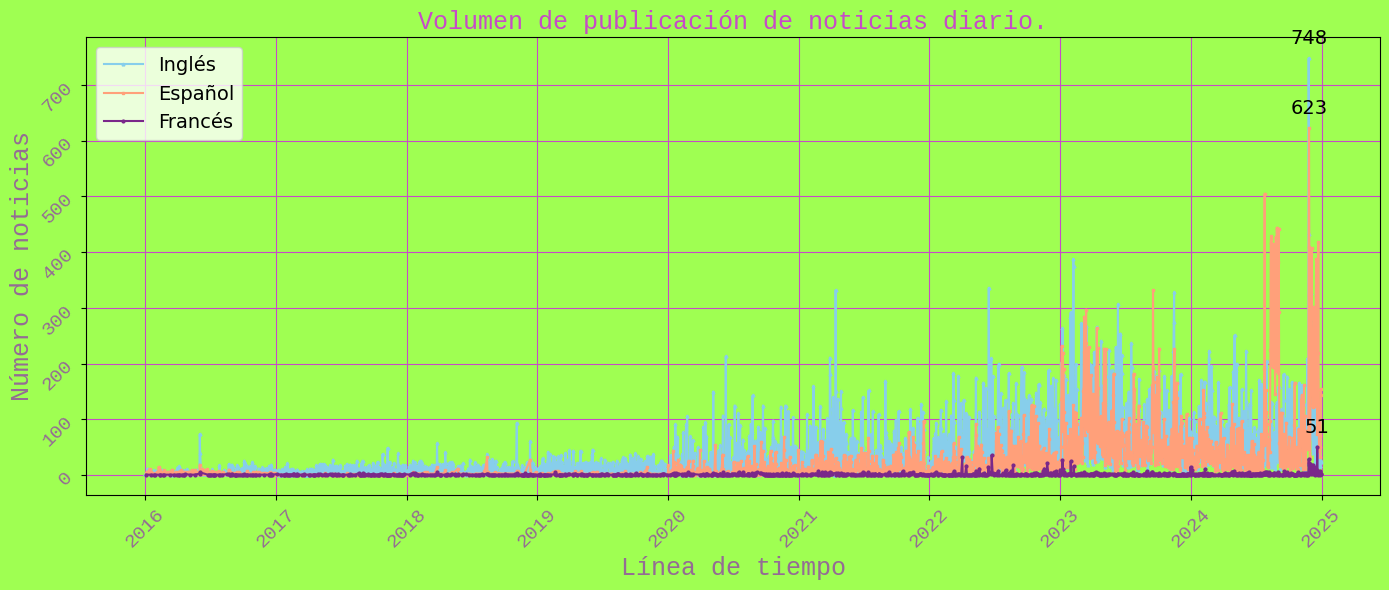

In [ ]:
# Crea el gráfico de líneas
plt.figure(figsize=(14, 6), facecolor='#9FFF52')  # Ajusta el tamaño de la figura si es necesario
plt.plot(dfen_conteo_diario['publish_date'], dfen_conteo_diario['count'], color='#87CEEB', marker='^', markersize=2, label='Inglés')
plt.plot(df_conteo_diario['publish_date'], df_conteo_diario['count'], color='#FFA07A', marker='s', markersize=2, label='Español')
plt.plot(dffr_conteo_diario['publish_date'], dffr_conteo_diario['count'], color='#7A288A', marker='o', markersize=2, label='Francés')

# Personaliza el gráfico
plt.xlabel('Línea de tiempo', fontdict={'family': 'Liberation Mono', 'color': '#946c94', 'size': 18})
plt.ylabel('Número de noticias', fontdict={'family': 'Liberation Mono', 'color': '#946c94', 'size': 18})
plt.title('Volumen de publicación de noticias diario.', fontdict={'family': 'Liberation Mono', 'color': '#C74BC7', 'size': 18})
plt.grid(True, color='#C74BC7')
plt.xticks(rotation=45, color='#C74BC7')
plt.yticks(rotation=45, color='#C74BC7')
plt.setp(plt.gca().get_xticklabels(), fontfamily='Liberation Mono', fontsize=14, color='#946c94')
plt.setp(plt.gca().get_yticklabels(), fontfamily='Liberation Mono', fontsize=14, color='#946c94')
plt.tight_layout()

# Convenciones
plt.legend(loc='upper left', fontsize=14)

# Pico máximo alcanzado y el día en el que se alcanzó ese número.
max_fr_idx = dffr_conteo_diario['count'].idxmax()
max_es_idx = df_conteo_diario['count'].idxmax()
max_en_idx = dfen_conteo_diario['count'].idxmax()

plt.annotate(f'{dffr_conteo_diario["count"].max()}', xy=(dffr_conteo_diario.loc[max_fr_idx, 'publish_date'], dffr_conteo_diario.loc[max_fr_idx, 'count']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=14, color='black')
plt.annotate(f'{df_conteo_diario["count"].max()}', xy=(df_conteo_diario.loc[max_es_idx, 'publish_date'], df_conteo_diario.loc[max_es_idx, 'count']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=14, color='black')
plt.annotate(f'{dfen_conteo_diario["count"].max()}', xy=(dfen_conteo_diario.loc[max_en_idx, 'publish_date'], dfen_conteo_diario.loc[max_en_idx, 'count']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=14, color='black')

# Agrega una convención para detallar que significa cada color
plt.annotate('', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=14)

ax = plt.gca()
ax.set_facecolor('#9FFF52')

# Muestra el gráfico
plt.show()

**Series de tiempo: descomposición multiplicativa de la Agrupación 1.**

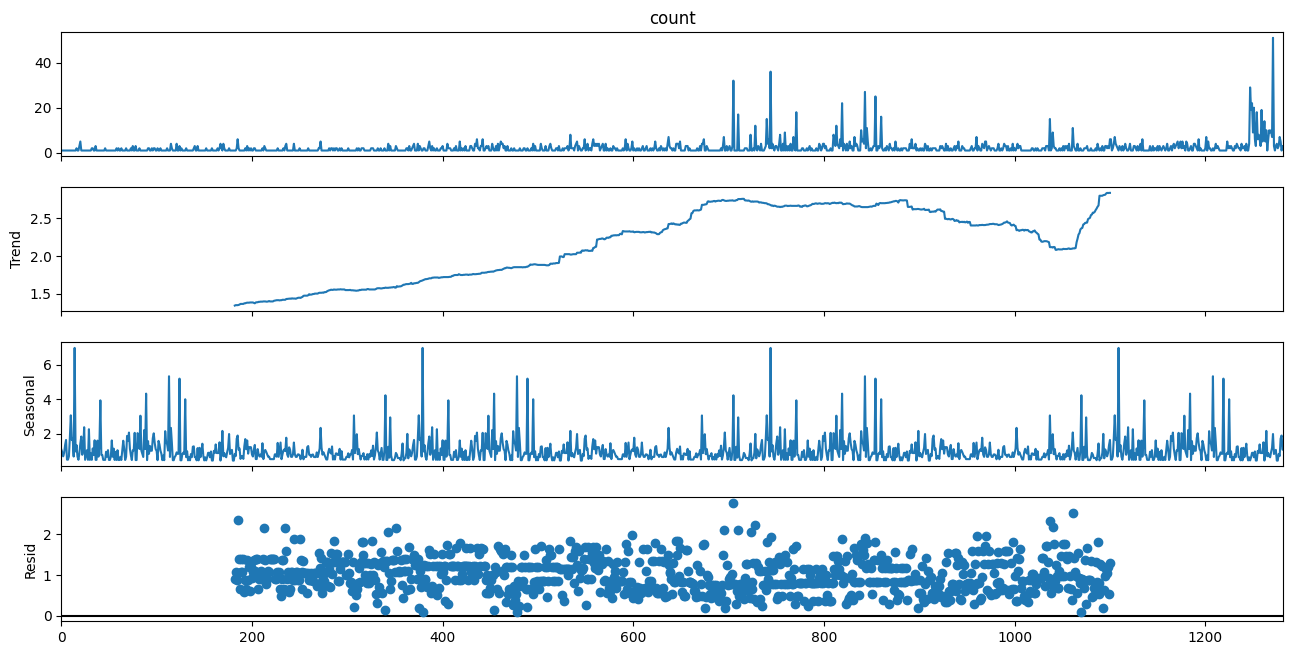

In [ ]:
# Descomposición multiplicativa francés
decompositionfr = seasonal_decompose(dffr_conteo_diario['count'], model='multiplicative', period=365)
fig = decompositionfr.plot()
fig.set_size_inches(14, 7)
plt.show()

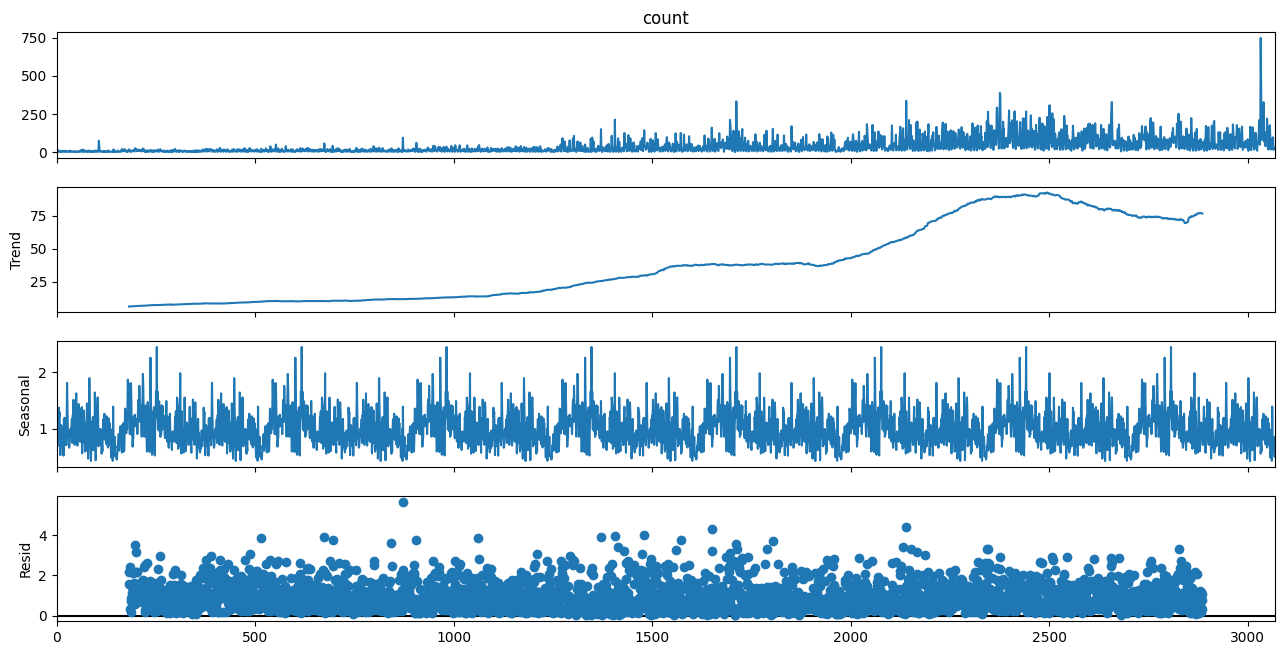

In [ ]:
# Descomposición multiplicativa inglés
decompositionen = seasonal_decompose(dfen_conteo_diario['count'], model='multiplicative', period=365)
fig = decompositionen.plot()
fig.set_size_inches(14, 7)
plt.show()

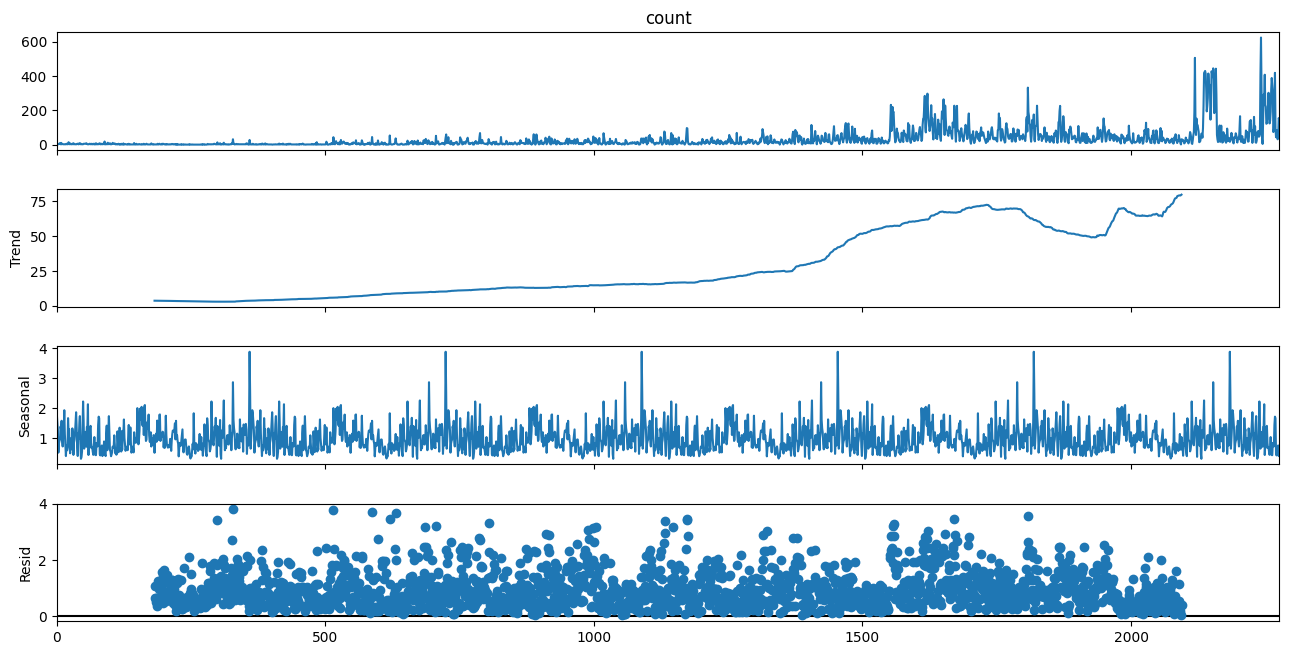

In [ ]:
# Descomposición multiplicativa español
decomposition = seasonal_decompose(df_conteo_diario['count'], model='multiplicative', period=365)
fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()

**Gráfico 2: Tendencias de la Agrupación 1.**

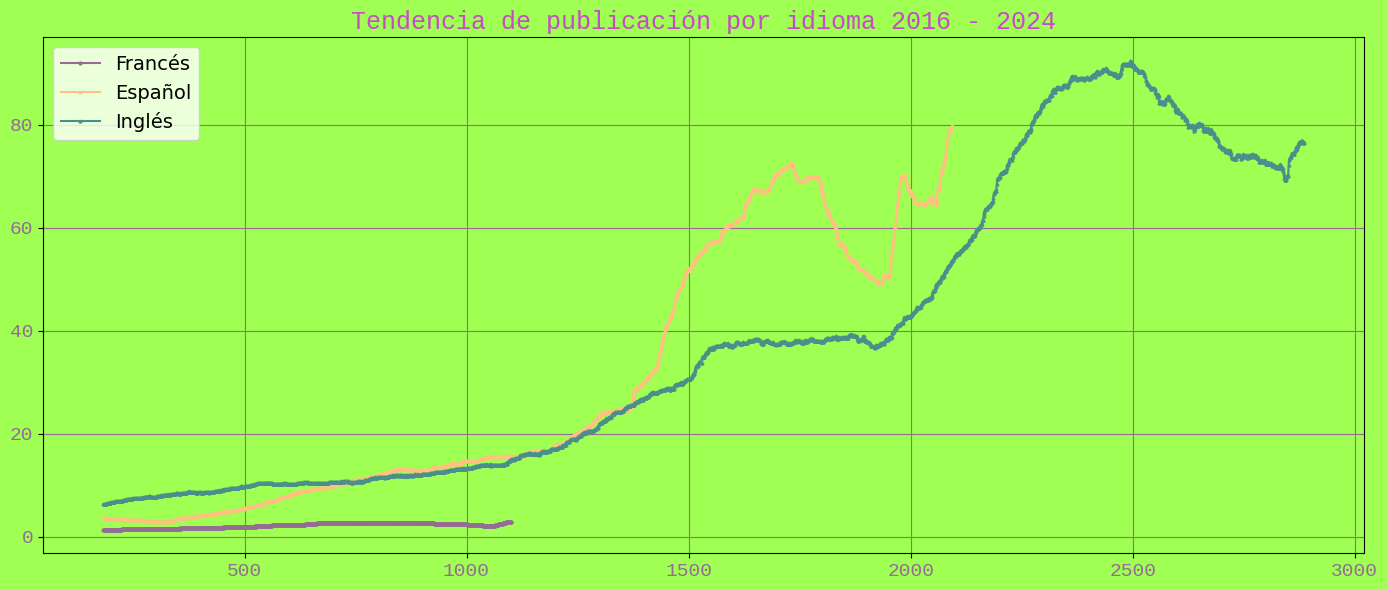

In [ ]:
# Definir tendencias a graficar.
trend1 = decompositionen.trend
trend2 = decomposition.trend
trend3 = decompositionfr.trend

# Crear gráfico de líneas.
fig, ax = plt.subplots(figsize=(14, 6), facecolor='#9FFF52')
ax.plot(trend3, color='#946c94', marker='o', markersize=2, label='Francés')
ax.plot(trend2, color='#FFC080', marker='s', markersize=2, label='Español')
ax.plot(trend1, color='#4B8F8C', marker='^', markersize=2, label='Inglés')

# Personalización del gráfico
plt.title('Tendencia de publicación por idioma 2016 - 2024', fontdict={'family': 'Liberation Mono', 'color': '#C74BC7', 'size': 18})
plt.xticks(color='#C74BC7')
plt.yticks(color='#C74BC7')
plt.setp(plt.gca().get_xticklabels(), fontfamily='Liberation Mono', fontsize=14, color='#946c94')
plt.setp(plt.gca().get_yticklabels(), fontfamily='Liberation Mono', fontsize=14, color='#946c94')
plt.tight_layout()
plt.grid(True, color='#946c94')
plt.legend(loc='upper left', fontsize=14)

ax = plt.gca()
ax.set_facecolor('#9FFF52')
plt.show()

**Gráfico 3: Estacionalidad de la Agrupación 1, francés.**

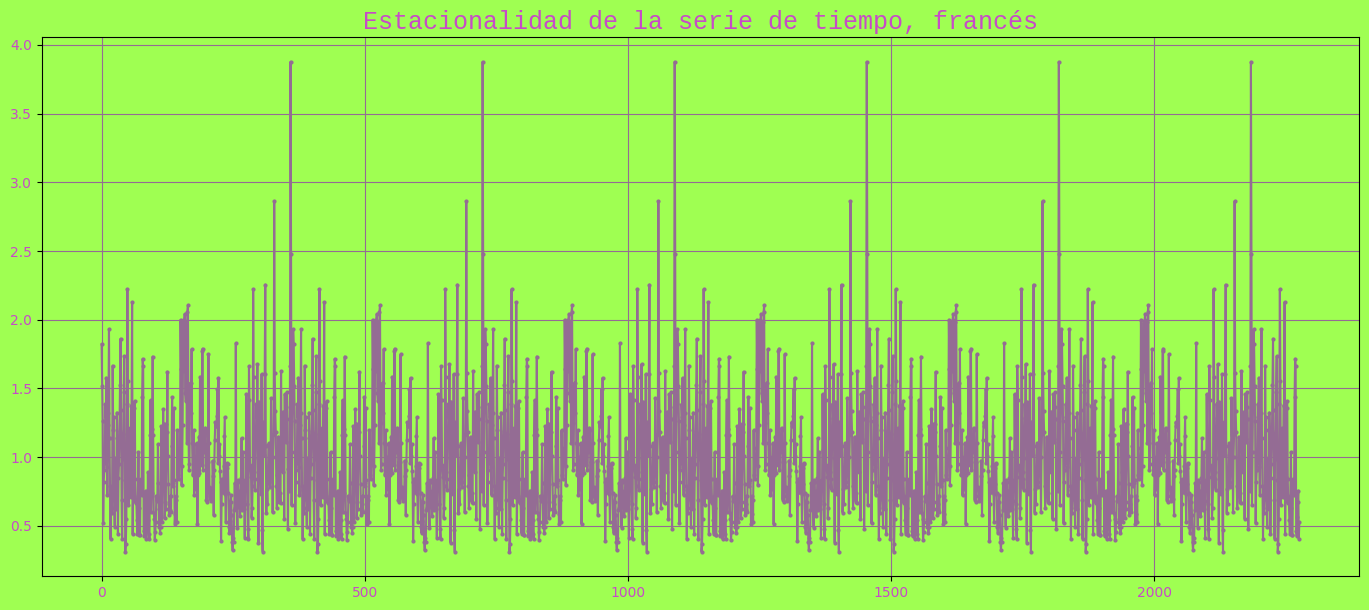

In [ ]:
# Definir estacionalidad a graficar
seas = decomposition.seasonal

# Crear el gráfico de líneas,
fig, ax = plt.subplots(figsize=(17, 7), facecolor='#9FFF52')
ax.plot(seas, color='#946c94', marker='o', markersize=2)

# Personalización del gráfico
plt.title('Estacionalidad de la serie de tiempo, francés', fontdict={'family': 'Liberation Mono', 'color': '#C74BC7', 'size': 18})
plt.xticks(color='#C74BC7')
plt.yticks(color='#C74BC7')
plt.grid(True, color='#946c94')

ax = plt.gca()
ax.set_facecolor('#9FFF52')

plt.show()

**Creación de nuevos dataframes con la columna publish_date dividida en año, mes y día.**

In [ ]:
dffr['publish_date'] = pd.to_datetime(dffr['publish_date'])
dfen['publish_date'] = pd.to_datetime(dfen['publish_date'])
df['publish_date'] = pd.to_datetime(df['publish_date'])

dffr_grouped = dffr.copy()
dffr_grouped['year'] = dffr_grouped['publish_date'].dt.year
dffr_grouped['month'] = dffr_grouped['publish_date'].dt.month
dffr_grouped['day'] = dffr_grouped['publish_date'].dt.day

dfen_grouped = dfen.copy()
dfen_grouped['year'] = dfen_grouped['publish_date'].dt.year
dfen_grouped['month'] = dfen_grouped['publish_date'].dt.month
dfen_grouped['day'] = dfen_grouped['publish_date'].dt.day

df_grouped = df.copy()
df_grouped['year'] = df_grouped['publish_date'].dt.year
df_grouped['month'] = df_grouped['publish_date'].dt.month
df_grouped['day'] = df_grouped['publish_date'].dt.day

**Agrupación 2: Conteo de noticias por año.**

In [ ]:
# Agrupa por año y cuenta la cantidad de títulos por año
yearly_title_counts_es = df_grouped.groupby('year')['title'].count()
yearly_title_counts_en = dfen_grouped.groupby('year')['title'].count()
yearly_title_counts_fr = dffr_grouped.groupby('year')['title'].count()

**Crear un dataframe con la Agrupación 2.**

In [ ]:
yearly_title_counts_es_df = yearly_title_counts_es.reset_index()
yearly_title_counts_en_df = yearly_title_counts_en.reset_index()
yearly_title_counts_fr_df = yearly_title_counts_fr.reset_index()

**Gráfico 3: Volumen de noticias anual en inglés**

Se puede modificar para visualizar los 3 idiomas.

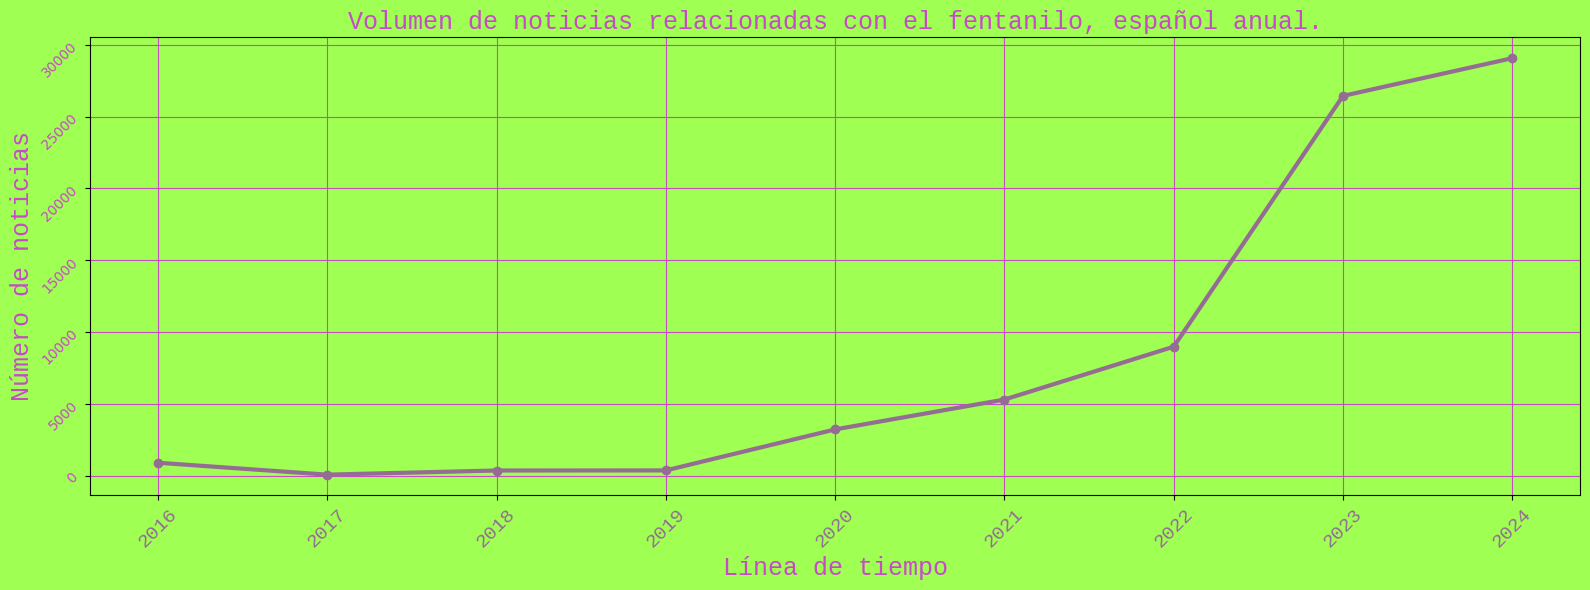

In [ ]:
# Crea el gráfico de líneas
plt.figure(figsize=(16, 6), facecolor='#9FFF52')
plt.plot(yearly_title_counts_es_df['year'], yearly_title_counts_es_df['title'], color='#946c94', marker='o', markersize=6, linewidth=3)

# Personalización el gráfico
plt.xlabel('Línea de tiempo', fontdict={'family': 'Liberation Mono', 'color': '#C74BC7', 'size': 18})
plt.ylabel('Número de noticias', fontdict={'family': 'Liberation Mono', 'color': '#C74BC7', 'size': 18})
plt.title('Volumen de noticias relacionadas con el fentanilo, español anual.', fontdict={'family': 'Liberation Mono', 'color': '#C74BC7', 'size': 18})
plt.grid(True, color='#C74BC7')
plt.xticks(rotation=45, color='#C74BC7')
plt.yticks(rotation=45, color='#C74BC7')
plt.setp(plt.gca().get_xticklabels(), fontfamily='Liberation Mono', fontsize=14, color='#946c94')
plt.tight_layout()

ax = plt.gca()
ax.set_facecolor('#9FFF52')

# Muestra el gráfico
plt.show()

**Agrupación 3: Conteno mensual para el año 2024.**

Adaptable para todos los años.

In [ ]:
# Filtra el DataFrame para el año 2024
dffr_2024 = dffr_grouped[dffr_grouped['year'] == 2024]

# Agrupa por mes y cuenta la cantidad de títulos
monthly_title_counts_2024 = dffr_2024.groupby('month')['title'].count()

# Crea un nuevo DataFrame
df_monthly_2024 = pd.DataFrame({'month': monthly_title_counts_2024.index,
                                'title_count': monthly_title_counts_2024.values})

# Imprime el nuevo DataFrame
df_monthly_2024

,month,title_count
0,1,55
1,2,43
2,3,12
3,4,50
4,5,49
5,6,44
6,7,65
7,8,49
8,9,27
9,10,40


**Gráfico 4: Volumen de noticias en francés, mensual 2024.**

Adaptable según el año e idioma en que se desea visualizar.

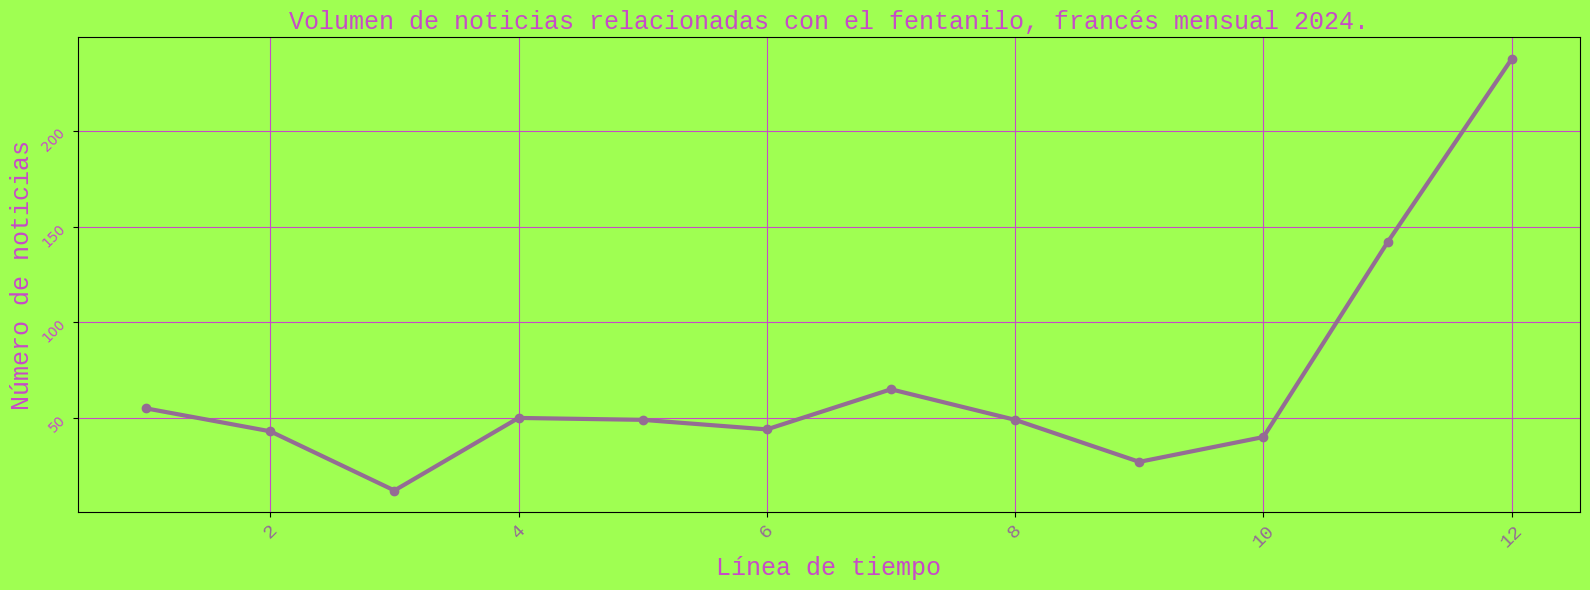

In [ ]:
# Crea el gráfico de líneas
plt.figure(figsize=(16, 6), facecolor='#9FFF52')
plt.plot(df_monthly_2024['month'], df_monthly_2024['title_count'], color='#946c94', marker='o', markersize=6, linewidth=3)

# Personaliza el gráfico
plt.xlabel('Línea de tiempo', fontdict={'family': 'Liberation Mono', 'color': '#C74BC7', 'size': 18})
plt.ylabel('Número de noticias', fontdict={'family': 'Liberation Mono', 'color': '#C74BC7', 'size': 18})
plt.title('Volumen de noticias relacionadas con el fentanilo, francés mensual 2024.', fontdict={'family': 'Liberation Mono', 'color': '#C74BC7', 'size': 18})
plt.grid(True, color='#C74BC7')
plt.xticks(rotation=45, color='#C74BC7')
plt.yticks(rotation=45, color='#C74BC7')
plt.setp(plt.gca().get_xticklabels(), fontfamily='Liberation Mono', fontsize=14, color='#946c94')
plt.tight_layout()

ax = plt.gca()
ax.set_facecolor('#9FFF52')

# Muestra el gráfico
plt.show()

**Agrupación 4: Se crea una nueva columna con todas las url que tengan el mismo titular usando los dataframe originales**

In [ ]:
dffr['publish_date'] = dffr['publish_date'].dt.date


dffr_grupo_titular = dffr.groupby('title').agg({
    'publish_date': lambda x: list(x),
    'url': list,
    'media_name' : lambda x: list(x)
}).reset_index()

# Renombra la columna 'url' a 'urls'
dffr_grupo_titular = dffr_grupo_titular.rename(columns={'url': 'urls'})

In [ ]:
dfen['publish_date'] = dfen['publish_date'].dt.date

dfen_grupo_titular = dfen.groupby('title').agg({
    'publish_date': lambda x: list(x),
    'url': list,
    'media_name' : lambda x: list(x)
}).reset_index()

# Renombra la columna 'url' a 'urls'
dfen_grupo_titular = dfen_grupo_titular.rename(columns={'url': 'urls'})

In [ ]:
df['publish_date'] = df['publish_date'].dt.date

df_grupo_titular = df.groupby('title').agg({
    'publish_date': lambda x: list(x),
    'url': list,
    'media_name' : lambda x: list(x)
}).reset_index()

# Renombra la columna 'url' a 'urls'
df_grupo_titular = df_grupo_titular.rename(columns={'url': 'urls'})

**Agrupación 5: Cantidad de titulares diarios.**

In [ ]:
df_grupo_titular['publish_date'] = df_grupo_titular['publish_date'].apply(lambda x: pd.to_datetime(x[0]) if isinstance(x, list) and len(x) > 0 else pd.NaT)
dfen_grupo_titular['publish_date'] = dfen_grupo_titular['publish_date'].apply(lambda x: pd.to_datetime(x[0]) if isinstance(x, list) and len(x) > 0 else pd.NaT)
dffr_grupo_titular['publish_date'] = dffr_grupo_titular['publish_date'].apply(lambda x: pd.to_datetime(x[0]) if isinstance(x, list) and len(x) > 0 else pd.NaT)

df_groupedtit = df_grupo_titular.groupby(df_grupo_titular['publish_date'].dt.date)['title'].count().reset_index()
dfen_groupedtit = dfen_grupo_titular.groupby(dfen_grupo_titular['publish_date'].dt.date)['title'].count().reset_index()
dffr_groupedtit = dffr_grupo_titular.groupby(dffr_grupo_titular['publish_date'].dt.date)['title'].count().reset_index()

df_groupedtit.columns = ['publish_date', 'count']
dfen_groupedtit.columns = ['publish_date', 'count']
dffr_groupedtit.columns = ['publish_date', 'count']

**Gráfico 5: Volumen de publicación de noticias diario, títulos agrupados.**

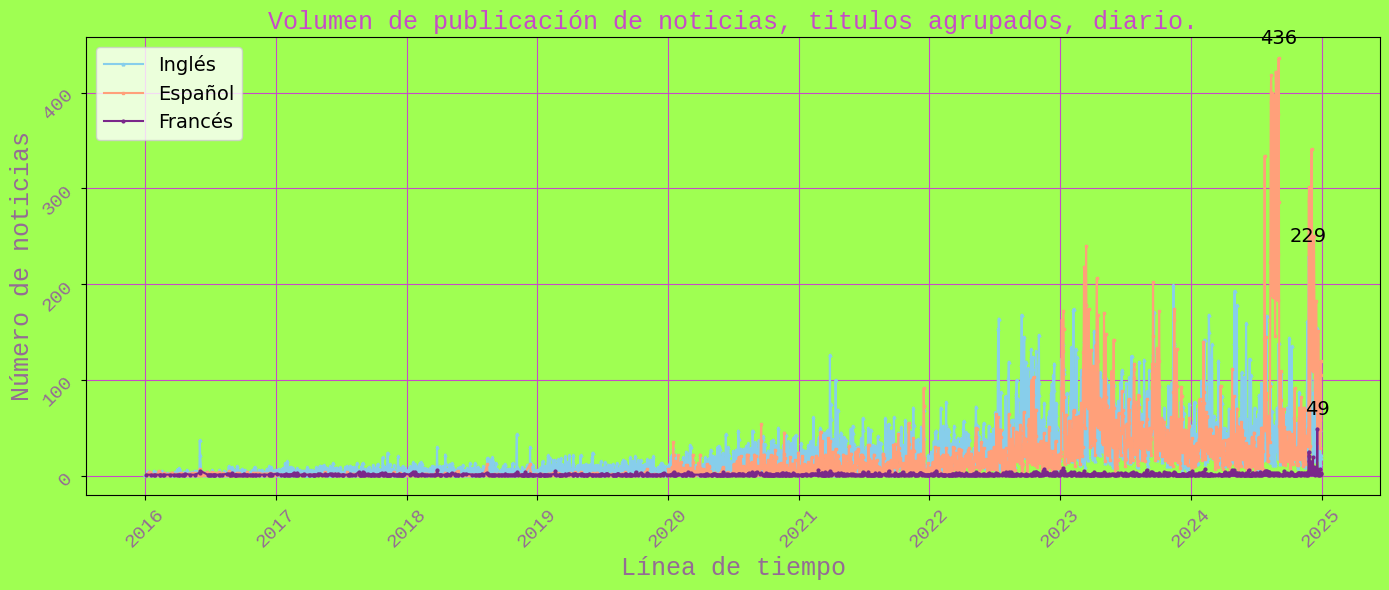

In [ ]:
# Crea el gráfico de líneas
plt.figure(figsize=(14, 6), facecolor='#9FFF52')  # Ajusta el tamaño de la figura si es necesario
plt.plot(dfen_groupedtit['publish_date'], dfen_groupedtit['count'], color='#87CEEB', marker='^', markersize=2, label='Inglés')
plt.plot(df_groupedtit['publish_date'], df_groupedtit['count'], color='#FFA07A', marker='s', markersize=2, label='Español')
plt.plot(dffr_groupedtit['publish_date'], dffr_groupedtit['count'], color='#7A288A', marker='o', markersize=2, label='Francés')

# Personaliza el gráfico
plt.xlabel('Línea de tiempo', fontdict={'family': 'Liberation Mono', 'color': '#946c94', 'size': 18})
plt.ylabel('Número de noticias', fontdict={'family': 'Liberation Mono', 'color': '#946c94', 'size': 18})
plt.title('Volumen de publicación de noticias, titulos agrupados, diario.', fontdict={'family': 'Liberation Mono', 'color': '#C74BC7', 'size': 18})
plt.grid(True, color='#C74BC7')  # Agrega una cuadrícula
plt.xticks(rotation=45, color='#C74BC7')  # Rota las etiquetas del eje x para mejor legibilidad
plt.yticks(rotation=45, color='#C74BC7')
plt.setp(plt.gca().get_xticklabels(), fontfamily='Liberation Mono', fontsize=14, color='#946c94') # Set font properties for xtick labels
plt.setp(plt.gca().get_yticklabels(), fontfamily='Liberation Mono', fontsize=14, color='#946c94') # Set font properties for ytick labels
plt.tight_layout() # Ajusta el diseño para evitar que las etiquetas se superpongan

plt.legend(loc='upper left', fontsize=14)

#Etiqueta el número alcanzado en el pico máximo y el día que se dió
max_fr_idx = dffr_groupedtit['count'].idxmax()
max_es_idx = df_groupedtit['count'].idxmax()
max_en_idx = dfen_groupedtit['count'].idxmax()

plt.annotate(f'{dffr_groupedtit["count"].max()}', xy=(dffr_groupedtit.loc[max_fr_idx, 'publish_date'], dffr_groupedtit.loc[max_fr_idx, 'count']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=14, color='black')
plt.annotate(f'{df_groupedtit["count"].max()}', xy=(df_groupedtit.loc[max_es_idx, 'publish_date'], df_groupedtit.loc[max_es_idx, 'count']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=14, color='black')
plt.annotate(f'{dfen_groupedtit["count"].max()}', xy=(dfen_groupedtit.loc[max_en_idx, 'publish_date'], dfen_groupedtit.loc[max_en_idx, 'count']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=14, color='black')

# Agrega una convención para detallar que significa cada color
plt.annotate('', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=14)

ax = plt.gca()
ax.set_facecolor('#9FFF52')

# Muestra el gráfico
plt.show()


**Series de tiempo: descomposición multiplicativa de la Agrupación 5.**

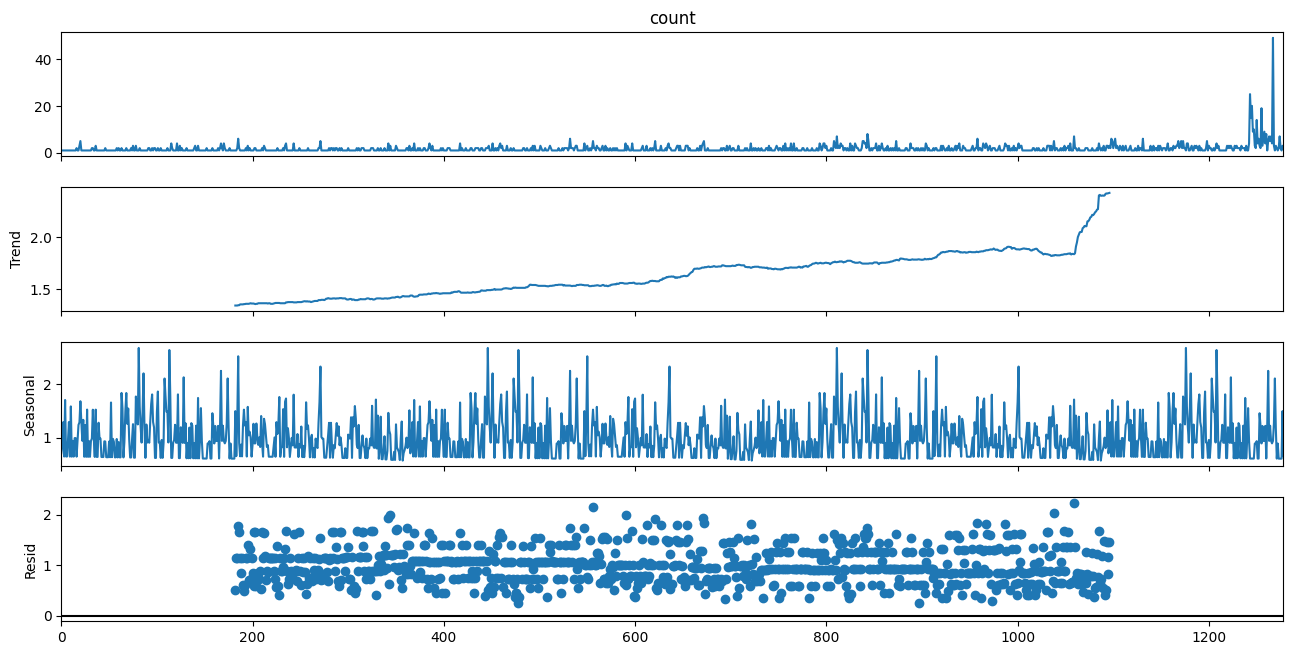

In [ ]:
# Descomposición multiplicativa francés
decompositionfrtit = seasonal_decompose(dffr_groupedtit['count'], model='multiplicative', period=365)
fig = decompositionfrtit.plot()
fig.set_size_inches(14, 7)
plt.show()

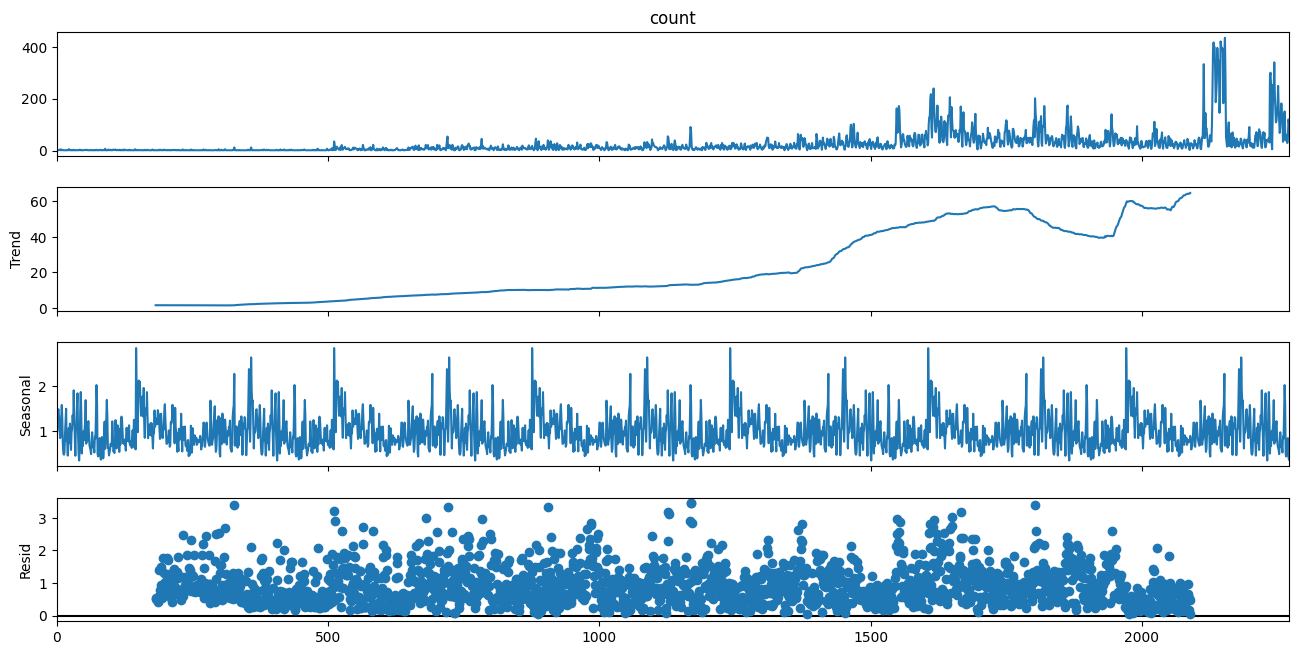

In [ ]:
# Descomposición multiplicativa español
decompositiontit = seasonal_decompose(df_groupedtit['count'], model='multiplicative', period=365)
fig = decompositiontit.plot()
fig.set_size_inches(14, 7)
plt.show()

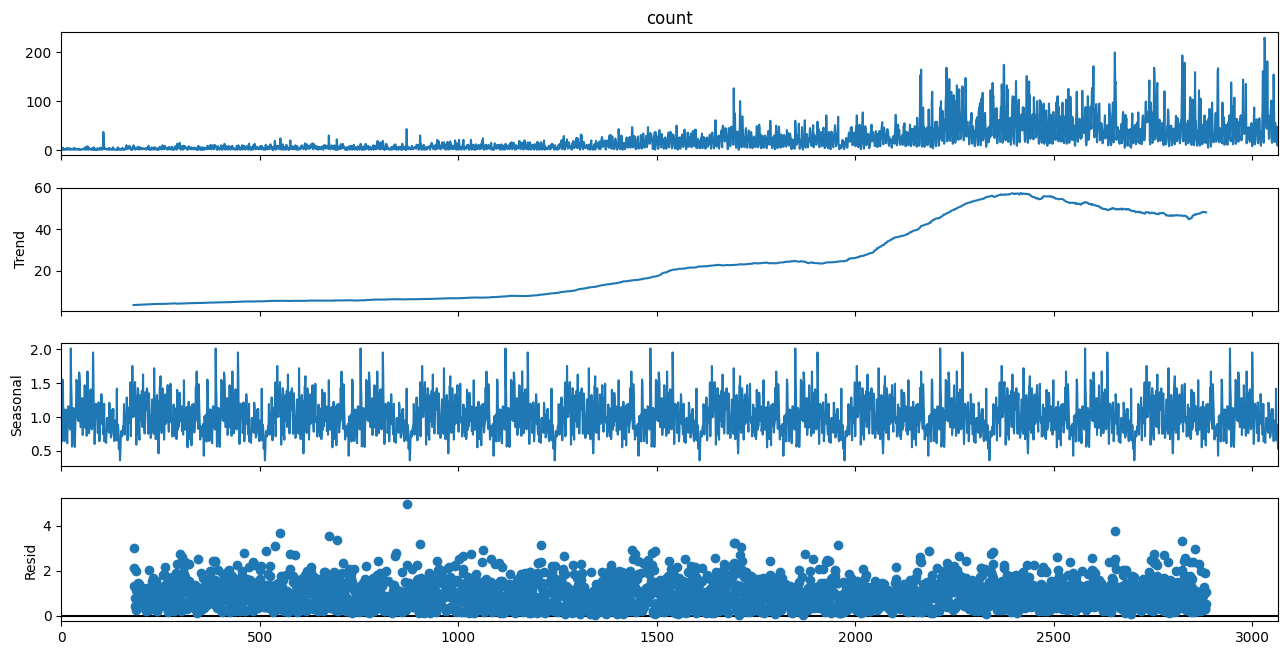

In [ ]:
# Descomposición multiplicativa inglés
decompositionentit = seasonal_decompose(dfen_groupedtit['count'], model='multiplicative', period=365)
fig = decompositionentit.plot()
fig.set_size_inches(14, 7)
plt.show()

**Gráfico 6: Tendendia de publicación de noticias con títulos agrupados, diario.**

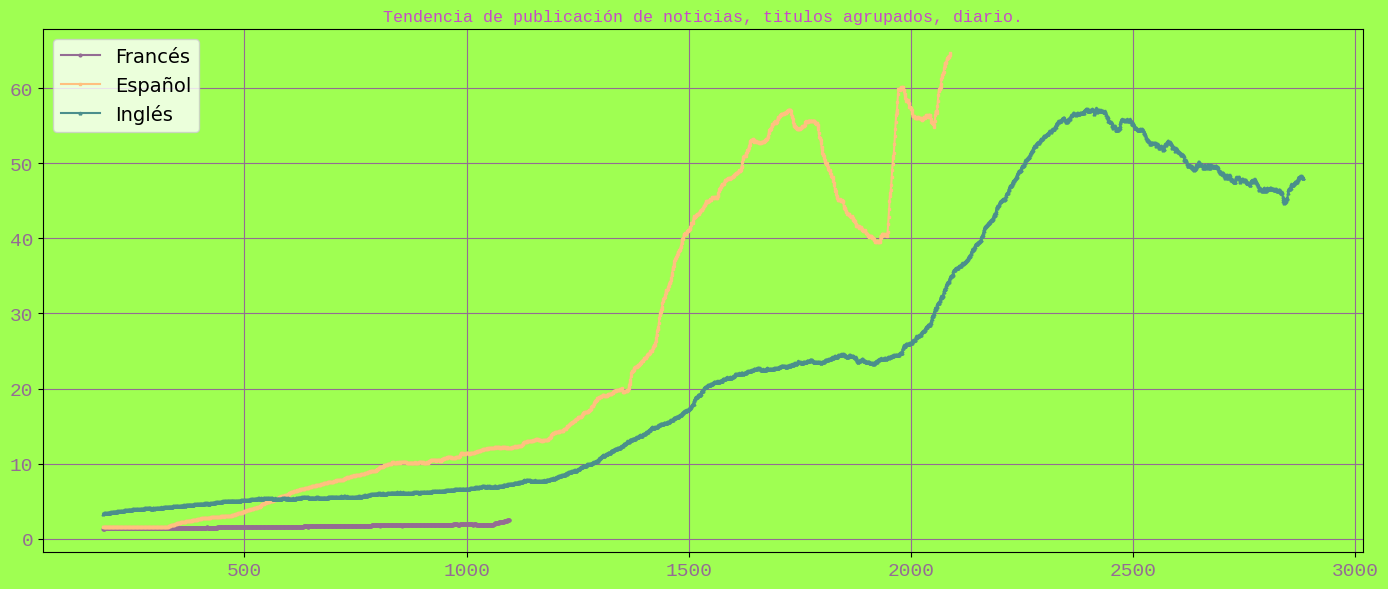

In [ ]:
# Definir tendencias a graficar
trend1tit = decompositionentit.trend
trend2tit = decompositiontit.trend
trend3tit = decompositionfrtit.trend

# crear el gráfico de líneas
fig, ax = plt.subplots(figsize=(14, 6), facecolor='#9FFF52')
ax.plot(trend3tit, color='#946c94', marker='o', markersize=2, label='Francés')
ax.plot(trend2tit, color='#FFC080', marker='s', markersize=2, label='Español')
ax.plot(trend1tit, color='#4B8F8C', marker='^', markersize=2, label='Inglés')

# Personalizar el gráfico
plt.title('Tendencia de publicación de noticias, titulos agrupados, diario.', fontdict={'family': 'Liberation Mono', 'color': '#C74BC7', 'size': 12})
plt.xticks(color='#C74BC7')
plt.yticks(color='#C74BC7')
plt.setp(plt.gca().get_xticklabels(), fontfamily='Liberation Mono', fontsize=14, color='#946c94') # Set font properties for xtick labels
plt.setp(plt.gca().get_yticklabels(), fontfamily='Liberation Mono', fontsize=14, color='#946c94') # Set font properties for ytick labels
plt.tight_layout()
plt.grid(True, color='#946c94')
plt.legend(loc='upper left', fontsize=14)

ax = plt.gca()
ax.set_facecolor('#9FFF52')
plt.show()

**Agrupación 7: Usando los dataframes en donde se agruparon las url que repiten titular, se crean nuevos dataframe en donde en la columna title esté presente la palabra fentanilo o fentanyl.**

In [ ]:
df_fentaniloen = dfen_grupo_titular[dfen_grupo_titular['title'].str.contains('fentanyl', na=False)]
df_fentanilo = df_grupo_titular[df_grupo_titular['title'].str.contains('fentanilo', na=False)]
df_fentanilofr = dffr_grupo_titular[dffr_grupo_titular['title'].str.contains('fentanyl', na=False)]

**Agrupacíon 8: Los dataframe de la agrupación 7 van a ser usados para crear nuevos dataframe en donde se haga un conteo diario de title.**

In [ ]:
df_groupeden = df_fentaniloen.groupby(df_fentaniloen['publish_date'].dt.date)['title'].count().reset_index()
df_grouped = df_fentanilo.groupby(df_fentanilo['publish_date'].dt.date)['title'].count().reset_index()
df_groupedfr = df_fentanilofr.groupby(df_fentanilofr['publish_date'].dt.date)['title'].count().reset_index()

df_groupeden.columns = ['publish_date', 'count']
df_grouped.columns = ['publish_date', 'count']
df_groupedfr.columns = ['publish_date', 'count']

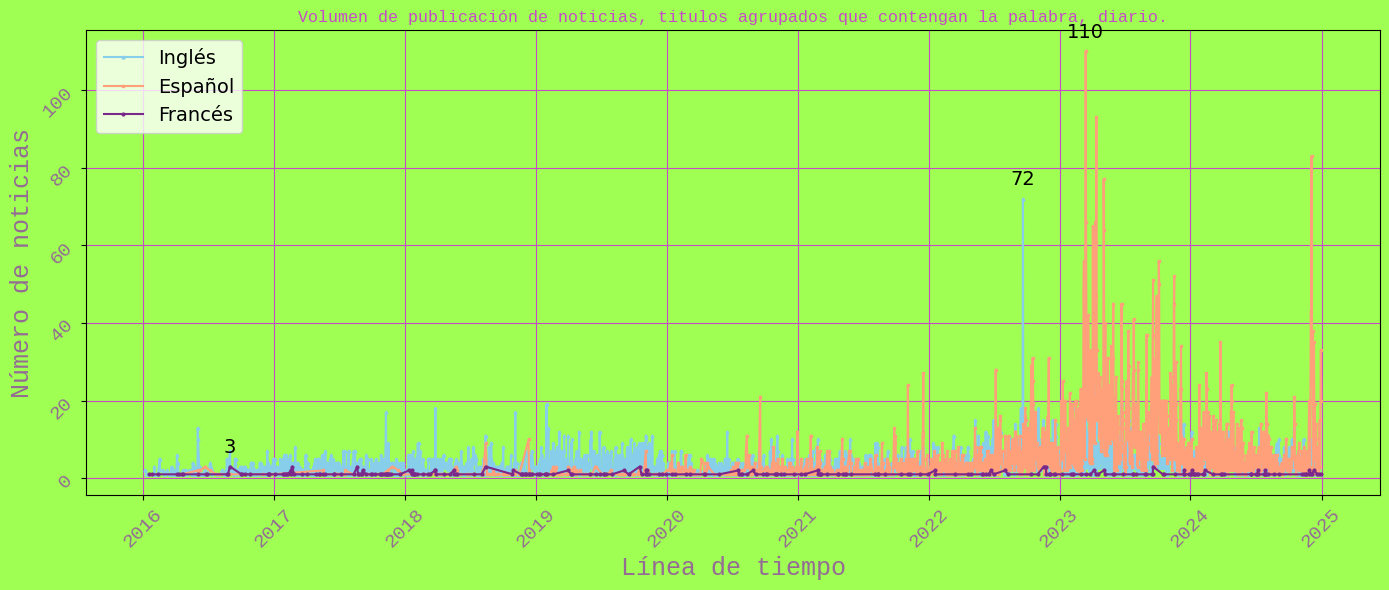

In [ ]:
# Crea el gráfico de líneas
plt.figure(figsize=(14, 6), facecolor='#9FFF52')  # Ajusta el tamaño de la figura si es necesario
plt.plot(df_groupeden['publish_date'], df_groupeden['count'], color='#87CEEB', marker='^', markersize=2, label='Inglés')
plt.plot(df_grouped['publish_date'], df_grouped['count'], color='#FFA07A', marker='s', markersize=2, label='Español')
plt.plot(df_groupedfr['publish_date'], df_groupedfr['count'], color='#7A288A', marker='o', markersize=2, label='Francés')

# Personaliza el gráfico
plt.xlabel('Línea de tiempo', fontdict={'family': 'Liberation Mono', 'color': '#946c94', 'size': 18})
plt.ylabel('Número de noticias', fontdict={'family': 'Liberation Mono', 'color': '#946c94', 'size': 18})
plt.title('Volumen de publicación de noticias, titulos agrupados que contengan la palabra, diario.', fontdict={'family': 'Liberation Mono', 'color': '#C74BC7', 'size': 12})
plt.grid(True, color='#C74BC7')  # Agrega una cuadrícula
plt.xticks(rotation=45, color='#C74BC7')  # Rota las etiquetas del eje x para mejor legibilidad
plt.yticks(rotation=45, color='#C74BC7')
plt.setp(plt.gca().get_xticklabels(), fontfamily='Liberation Mono', fontsize=14, color='#946c94') # Set font properties for xtick labels
plt.setp(plt.gca().get_yticklabels(), fontfamily='Liberation Mono', fontsize=14, color='#946c94') # Set font properties for ytick labels
plt.tight_layout() # Ajusta el diseño para evitar que las etiquetas se superpongan

plt.legend(loc='upper left', fontsize=14)

#Etiqueta el número alcanzado en el pico máximo y el día que se dió
max_fr_idx = df_groupedfr['count'].idxmax()
max_es_idx = df_grouped['count'].idxmax()
max_en_idx = df_groupeden['count'].idxmax()

plt.annotate(f'{df_groupedfr["count"].max()}', xy=(df_groupedfr.loc[max_fr_idx, 'publish_date'], df_groupedfr.loc[max_fr_idx, 'count']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=14, color='black')
plt.annotate(f'{df_grouped["count"].max()}', xy=(df_grouped.loc[max_es_idx, 'publish_date'], df_grouped.loc[max_es_idx, 'count']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=14, color='black')
plt.annotate(f'{df_groupeden["count"].max()}', xy=(df_groupeden.loc[max_en_idx, 'publish_date'], df_groupeden.loc[max_en_idx, 'count']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=14, color='black')

# Agrega una convención para detallar que significa cada color
plt.annotate('', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=14)

ax = plt.gca()
ax.set_facecolor('#9FFF52')

# Muestra el gráfico
plt.show()

**Series de tiempo: descomposición multiplicativa de la Agrupación 8.**

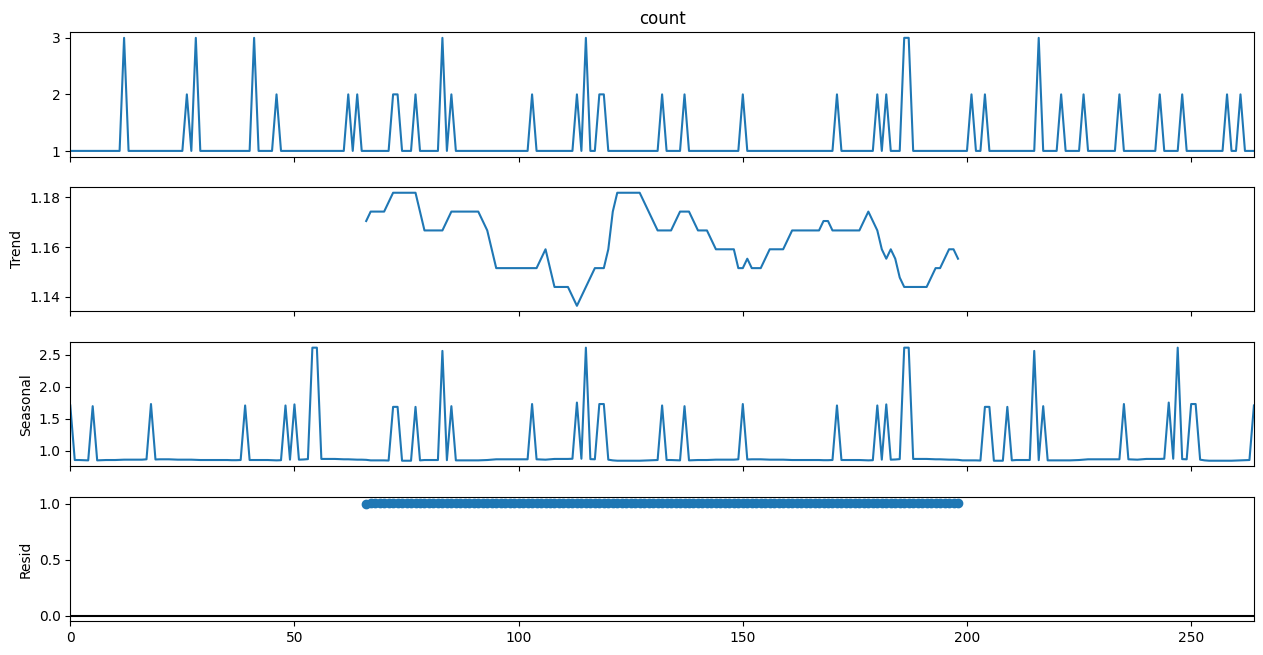

In [ ]:
# Descomposición multiplicativa francés
decompositionfrfen = seasonal_decompose(df_groupedfr['count'], model='multiplicative', period=132)
fig = decompositionfrfen.plot()
fig.set_size_inches(14, 7)
plt.show()

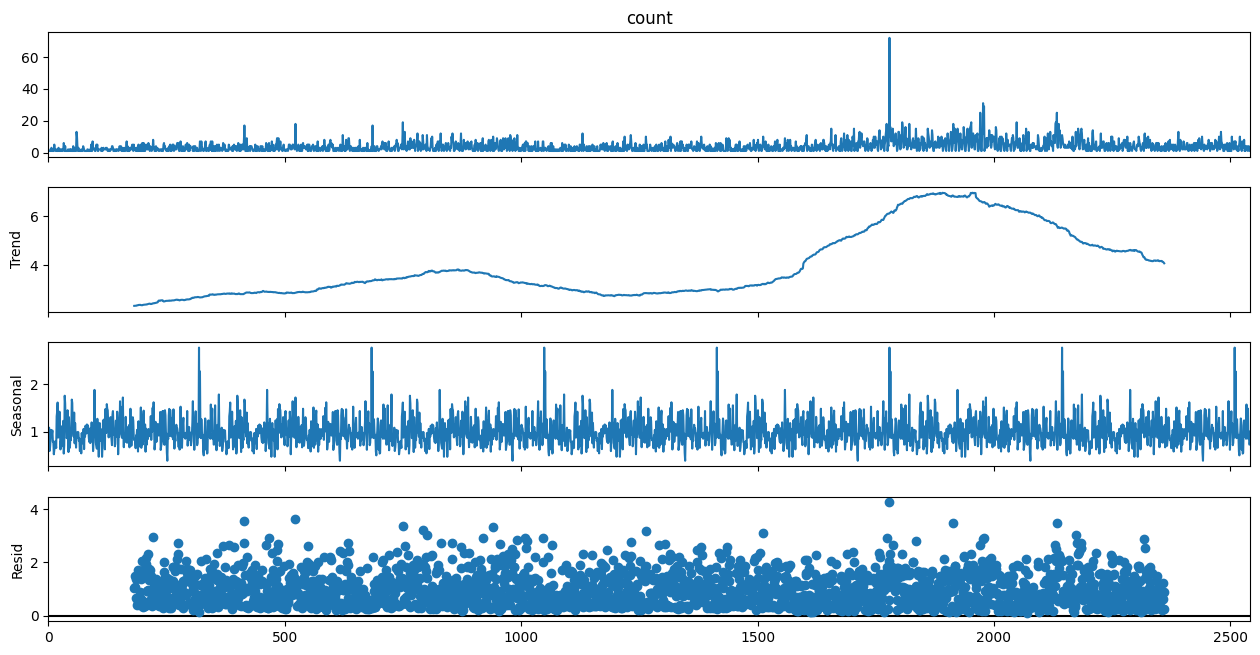

In [ ]:
# Descomposición multiplicativa inglés
decompositionenfen = seasonal_decompose(df_groupeden['count'], model='multiplicative', period=365)
fig = decompositionenfen.plot()
fig.set_size_inches(14, 7)
plt.show()

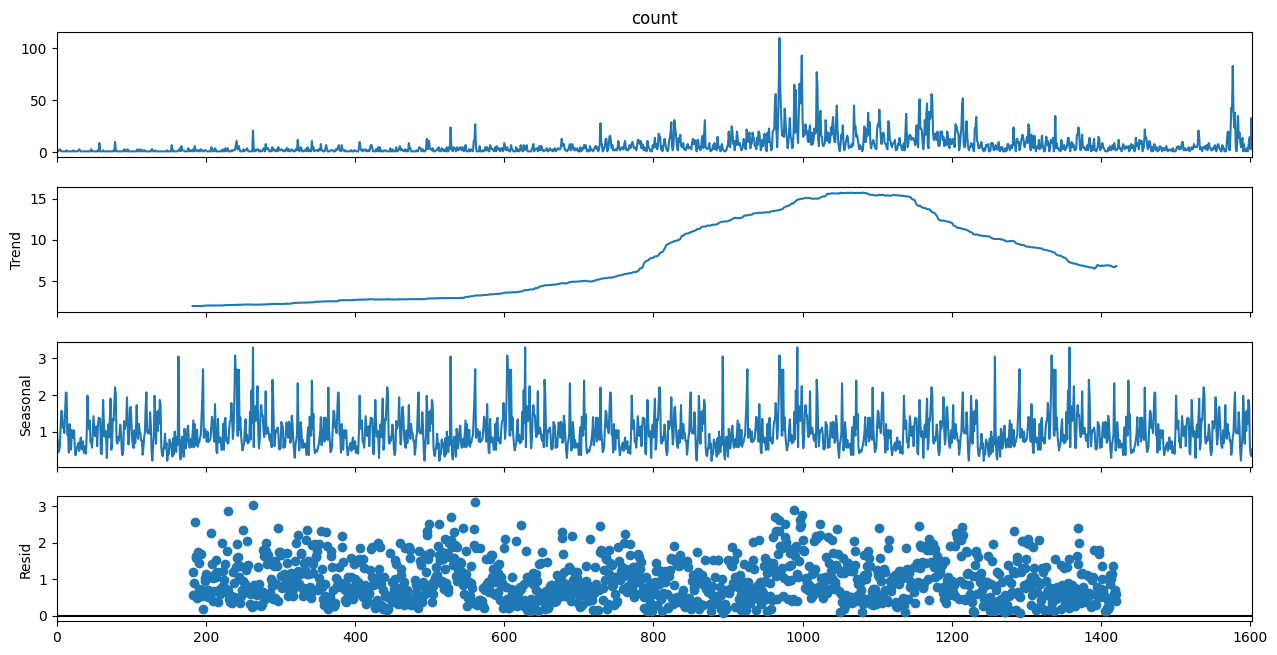

In [ ]:
# Descomposición multiplicativa
decompositionfen = seasonal_decompose(df_grouped['count'], model='multiplicative', period=365)
fig = decompositionfen.plot()
fig.set_size_inches(14, 7)
plt.show()

**Gráfico 8: Tendencia de publicación de Agrupación 8.**

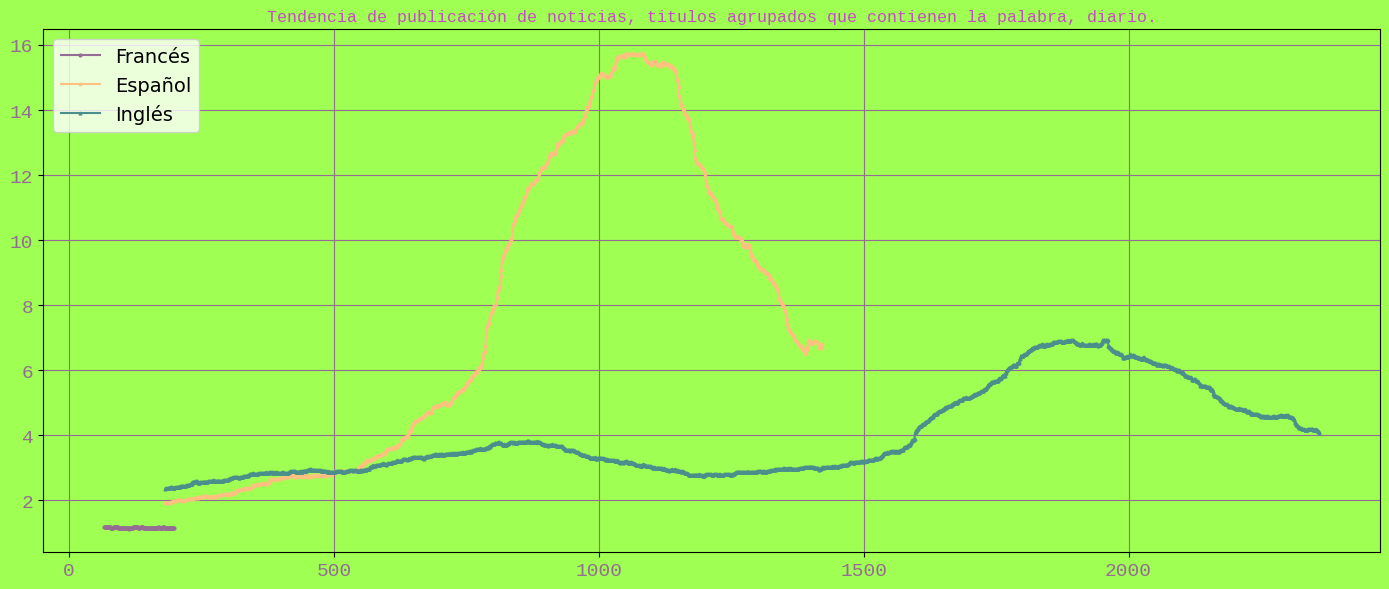

In [ ]:
# Definir tendencias a graficar
trend1fen = decompositionenfen.trend
trend2fen = decompositionfen.trend
trend3fen = decompositionfrfen.trend

# Crear el gráfico de líneas
fig, ax = plt.subplots(figsize=(14, 6), facecolor='#9FFF52')
ax.plot(trend3fen, color='#946c94', marker='o', markersize=2, label='Francés')
ax.plot(trend2fen, color='#FFC080', marker='s', markersize=2, label='Español')
ax.plot(trend1fen, color='#4B8F8C', marker='^', markersize=2, label='Inglés')

# Personalizar el gráfico
plt.title('Tendencia de publicación de noticias, titulos agrupados que contienen la palabra, diario.', fontdict={'family': 'Liberation Mono', 'color': '#C74BC7', 'size': 12})
plt.xticks(color='#C74BC7')
plt.yticks(color='#C74BC7')
plt.setp(plt.gca().get_xticklabels(), fontfamily='Liberation Mono', fontsize=14, color='#946c94') # Set font properties for xtick labels
plt.setp(plt.gca().get_yticklabels(), fontfamily='Liberation Mono', fontsize=14, color='#946c94') # Set font properties for ytick labels
plt.tight_layout()
plt.grid(True, color='#946c94')
plt.legend(loc='upper left', fontsize=14)

ax = plt.gca()
ax.set_facecolor('#9FFF52')
plt.show()

**Gráfico 9: Estacionalidad, titulos agrupados que contienen la palabra.**

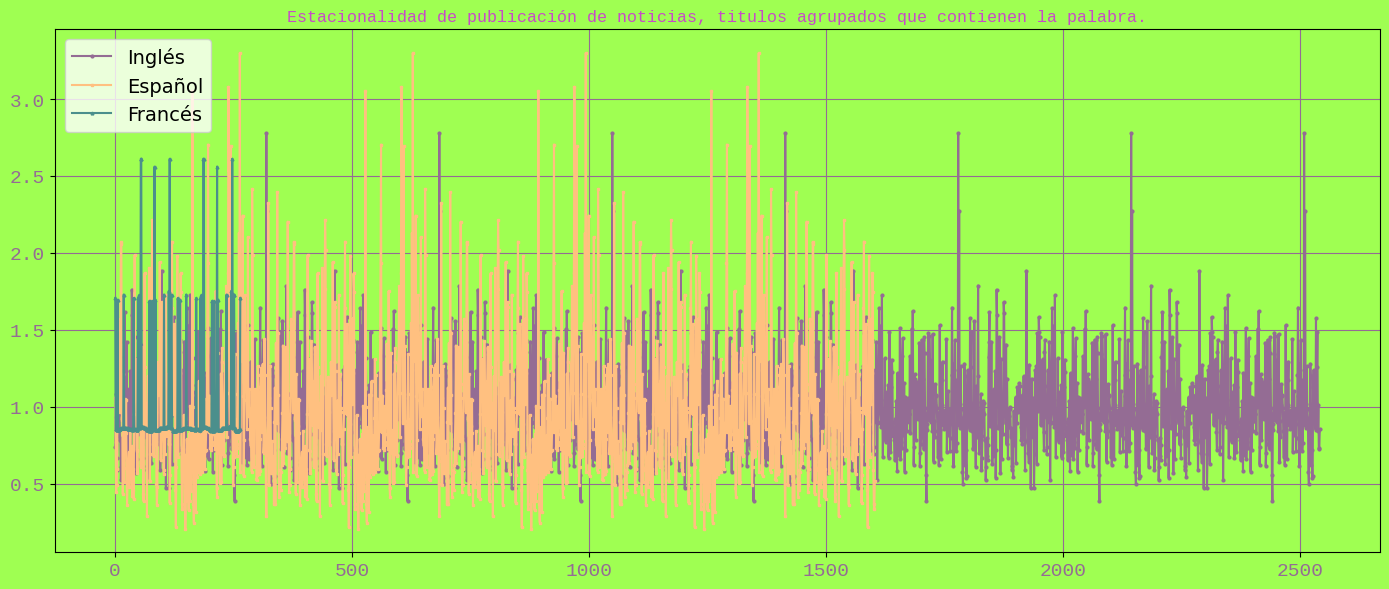

In [ ]:
# Definir estacionalidades a graficar
Esta1fen = decompositionenfen.seasonal
Esta2fen = decompositionfen.seasonal
Esta3fen = decompositionfrfen.seasonal

# Crear el gráfico de líneas
fig, ax = plt.subplots(figsize=(14, 6), facecolor='#9FFF52')
ax.plot(Esta1fen, color='#946c94', marker='o', markersize=2, label='Inglés')
ax.plot(Esta2fen, color='#FFC080', marker='s', markersize=2, label='Español')
ax.plot(Esta3fen, color='#4B8F8C', marker='^', markersize=2, label='Francés')

# personalizar el gráfico
plt.title('Estacionalidad de publicación de noticias, titulos agrupados que contienen la palabra.', fontdict={'family': 'Liberation Mono', 'color': '#C74BC7', 'size': 12})
plt.xticks(color='#C74BC7')
plt.yticks(color='#C74BC7')
plt.setp(plt.gca().get_xticklabels(), fontfamily='Liberation Mono', fontsize=14, color='#946c94')
plt.setp(plt.gca().get_yticklabels(), fontfamily='Liberation Mono', fontsize=14, color='#946c94')
plt.tight_layout()
plt.grid(True, color='#946c94')
plt.legend(loc='upper left', fontsize=14)

ax = plt.gca()
ax.set_facecolor('#9FFF52')
plt.show()

**Análisis de lenguaje natural, procesamiento de lenguaje natural.**

-Español.

In [ ]:
# Definir el modelo de procesamiento de lenguaje a utilizar
nlp = spacy.load('es_core_news_sm')

# Funciones de preprocesamiento de texto
def replace_tildes(text):
    replacements = {
        'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u',
        'Á': 'A', 'É': 'E', 'Í': 'I', 'Ó': 'O', 'Ú': 'U',
        'ñ': 'n', 'Ñ': 'N'
    }
    for accented_char, unaccented_char in replacements.items():
        text = re.sub(accented_char, unaccented_char, text)
    return text

def procesar_texto(texto):
    texto = replace_tildes(texto)
    doc = nlp(texto)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.like_num]
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Aplica la función a cada fila de la columna "title"
df_fentanilo['preprocesado'] = df_fentanilo['title'].apply(procesar_texto)

<ipython-input-25-00d8fe245cf0>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fentanilo['preprocesado'] = df_fentanilo['title'].apply(procesar_texto)


**Nube de palabras con las palabras más frecuentes, dataframe procesado.**

-Español.

In [ ]:
# Forma de la nube de palabras
mask = np.array(Image.open('/content/round_brushes_2.jpg').convert('L'))

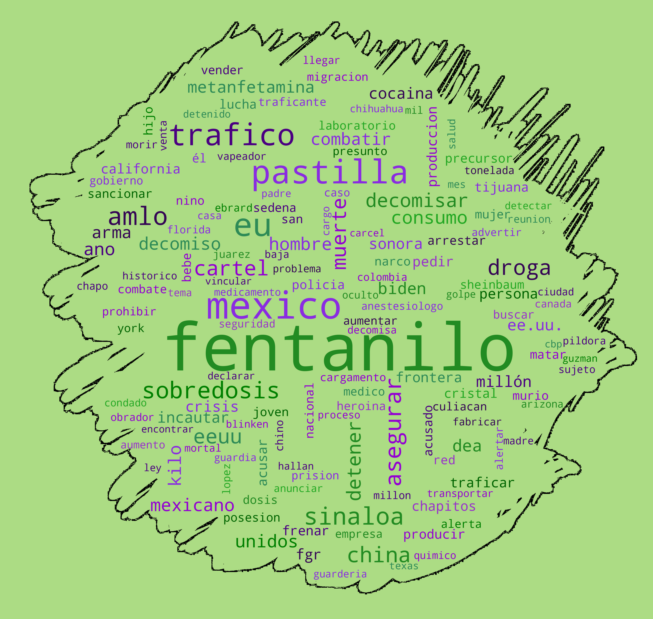

In [ ]:
# Definir variable que contiene el texto preprocesado
texto = ' '.join(df_fentanilo['preprocesado'])

# Crea un contador de palabras
contador = Counter(texto.split())

# Colores de las palabras de la nube
colores = {
    "morado_intenso1": "#4B0082",
    "morado_intenso2": "#8A2BE2",
    "morado_intenso3": "#9400D3",
    "morado_intenso4": "#9932CC",
    "morado_intenso5": "#350655",
    "verde_oscuro1": "#006400",
    "verde_oscuro2": "#008000",
    "verde_oscuro3": "#228B22",
    "verde_oscuro4": "#2E8B57",
    "verde_oscuro5": "#23a823"
}

def color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    """
    Función para asignar colores aleatorios de verde o morado a las palabras.
    """
    verde_o_morado = random.choice(["verde", "morado"])
    if verde_o_morado == "verde":
        color = random.choice(list(colores.values())[3:])
    else:
        color = random.choice(list(colores.values())[:3])
    return color

# Creación y personalización de la nube de palabras
wordcloud = WordCloud(
    width=1000, height=400,
    font_path=None,
    background_color='#acdc84',
    max_words=150,
    contour_width=3,
    contour_color='black',
    margin=0,
    mask=mask,
    color_func=color_func,
).generate_from_frequencies(contador)


fig, ax = plt.subplots(figsize=(12, 6), facecolor='#acdc84')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Análisis de lenguaje natural, procesamiento de lenguaje natural.**

-Inglés.

In [ ]:
# Definir el modelo de procesamiento de lenguaje a utilizar
nlp_en = spacy.load('en_core_web_sm')

# Funciones de preprocesamiento de texto
def procesar_texto_en(texto):
    if isinstance(texto, str): #Manejo de valores nulos
        doc = nlp_en(texto)
        tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.like_num]
        preprocessed_text = ' '.join(tokens)
        return preprocessed_text
    else:
        return "" # o el valor que quieras para los nulos

# Ejemplo de uso (asumiendo que tu DataFrame en inglés se llama df_ingles)
df_fentaniloen['preprocesado'] = df_fentaniloen['title'].apply(procesar_texto_en)

<ipython-input-30-a26fb7e50c88>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fentaniloen['preprocesado'] = df_fentaniloen['title'].apply(procesar_texto_en)


**Nube de palabras con las palabras más frecuentes, dataframe procesado.**

-Inglés.

In [ ]:
# Forma de la nube de palabras
mask2 = np.array(Image.open('/content/proxy-image.jpg').convert('L'))

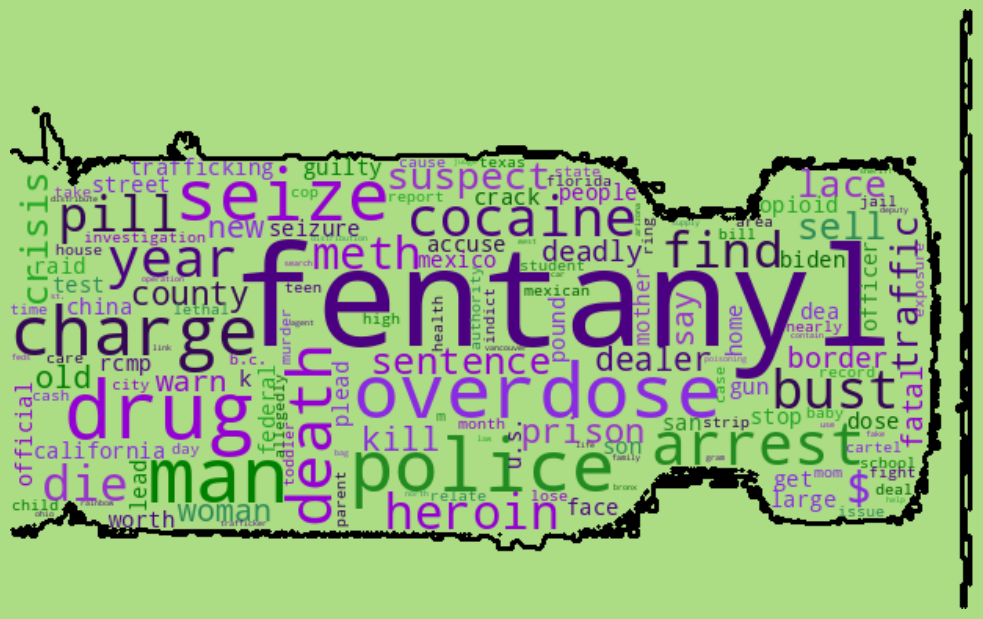

In [ ]:
# Definir variable que contiene el texto preprocesado
texto2 = ' '.join(df_fentaniloen['preprocesado'])
contador2 = Counter(texto2.split())

# Creazción y personalización de la nube de palabras
wordcloud = WordCloud(
    width=1000, height=400,
    font_path=None,
    background_color='#acdc84',
    max_words=150,
    contour_width=3,
    contour_color='black',
    margin=0,
    color_func=color_func,
    mask=mask2,
).generate_from_frequencies(contador2)


fig, ax = plt.subplots(figsize=(12, 6), facecolor='#acdc84')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Definir el modelo de procesamiento de lenguaje a utilizat
nlp_en = spacy.load('fr_core_news_sm')

# Funciones de preprocesamiento de texto
def procesar_texto_fr(texto):
    if isinstance(texto, str):
        doc = nlp_en(texto)
        tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.like_num]
        preprocessed_text = ' '.join(tokens)
        return preprocessed_text
    else:
        return ""

# Ejemplo de uso (asumiendo que tu DataFrame en inglés se llama df_ingles)
df_fentanilofr['preprocesado'] = df_fentanilofr['title'].apply(procesar_texto_fr)

<ipython-input-34-0da9e2358a36>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fentanilofr['preprocesado'] = df_fentanilofr['title'].apply(procesar_texto_fr)


**Nube de palabras con las palabras más frecuentes, dataframe procesado.**

-Francés.

In [ ]:
# Forma de la nube de palabras
mask3 = np.array(Image.open('/content/27114.jpg').convert('L'))
nuevo_ancho = 1000  # Ajusta el nuevo ancho
nuevo_alto = 1000   # Ajusta el nuevo alto
mask3_resized = np.array(Image.fromarray(mask3).resize((nuevo_ancho, nuevo_alto)))

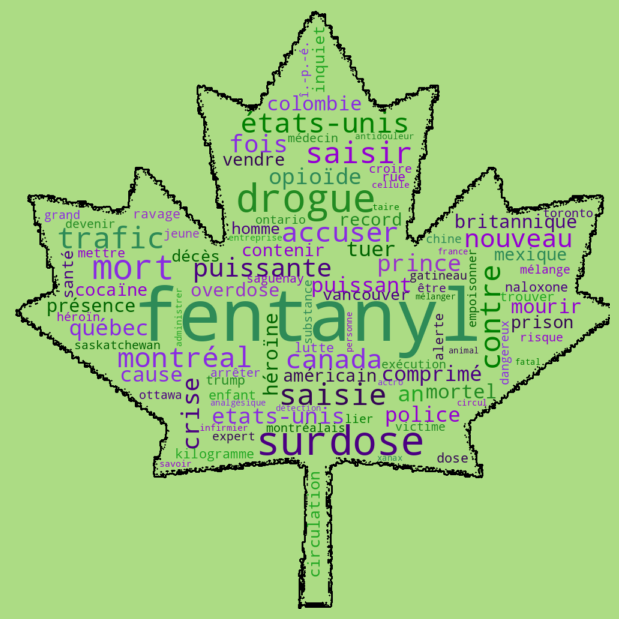

In [ ]:
# Definir la variable que tiene el texto preprocesado
texto3 = ' '.join(df_fentanilofr['preprocesado'])
contador3 = Counter(texto3.split())

# Colores de las palabras de la nube
colores = {
    "morado_intenso1": "#4B0082",
    "morado_intenso2": "#8A2BE2",
    "morado_intenso3": "#9400D3",
    "morado_intenso4": "#9932CC",
    "morado_intenso5": "#350655",
    "verde_oscuro1": "#006400",
    "verde_oscuro2": "#008000",
    "verde_oscuro3": "#228B22",
    "verde_oscuro4": "#2E8B57",
    "verde_oscuro5": "#23a823"
}

def color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    """
    Función para asignar colores aleatorios de verde o morado a las palabras.
    """
    verde_o_morado = random.choice(["verde", "morado"])
    if verde_o_morado == "verde":
        color = random.choice(list(colores.values())[3:])
    else:
        color = random.choice(list(colores.values())[:3])
    return color

# Creazción y personalización de la nube de palabras
wordcloud = WordCloud(
    width=1000, height=600,
    font_path=None,
    background_color='#acdc84',
    max_words=100,
    contour_width=3,
    contour_color='black',
    margin=0,
    color_func=color_func,
    mask=mask3_resized,
).generate_from_frequencies(contador3)


fig, ax = plt.subplots(figsize=(12, 6), facecolor='#acdc84')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()